In [1]:
import os
import json
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/peaceforlives/Documents/Projects/cyberbullying/jupyter'

In [3]:
def plot_cv(file, ngram, labelset, show=False):
    
    df = pd.read_json(file, lines=True)

    acc = pd.DataFrame(df['f1_valid'].values.tolist(), index=df.name)
    print(acc.mean(axis=1))
    
    f1_v = pd.DataFrame(df['f1_valid'].values.tolist(), index=df.name)
    fig, ax = plt.subplots(figsize=(10,5))
    f1_v.T.plot(ax=ax)
    ax.set_xlabel('K-fold')
    ax.set_ylabel('f1 score')
    fig.suptitle('f1 score of each classifier over CV fold on ' + ngram + ' gram model with labels from ' +
                 labelset, fontsize=15)
    plt.show()
#     plt.savefig(i.stem+'.png')
    
    if show:
        return df

In [4]:
# ROOT = 'C:\\Users\\niti.mishra\\Documents\\Personal\\cyberbullying\\'
ROOT = '/Users/peaceforlives/Documents/Projects/cyberbullying'

RESULTS = Path(os.path.join(ROOT, 'results'))
# RESULTS = Path(os.path.join(ROOT, 'results\\1g2g'))
PLOTS = Path(os.path.join(RESULTS))
files = [i for i in list(RESULTS.iterdir()) if '.json' in i.suffix ]
files

[PosixPath('/Users/peaceforlives/Documents/Projects/cyberbullying/results/TRACE_results7868_stem.json'),
 PosixPath('/Users/peaceforlives/Documents/Projects/cyberbullying/results/TRACE_results7868.json')]

TRACE_results7868
name
LogisticRegression (TruncatedSVD)    0.652040
LogisticRegression                   0.646774
SGDClassifier (TruncatedSVD)         0.641962
SGDClassifier                        0.628590
SVC                                  0.622714
MultinomialNB                        0.657943
GaussianNB (TruncatedSVD)            0.512343
dtype: float64


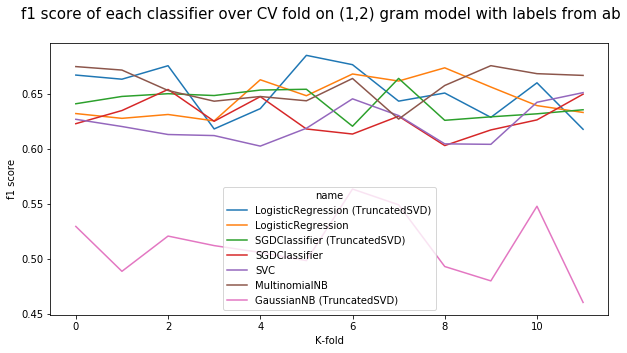

In [5]:
for i in files[1:]:
    print(i.stem)
    plot_cv(i, ngram='(1,2)', labelset='ab')
    

In [22]:
df = pd.read_json(files[0], lines=True)
df.head()
# acc = pd.DataFrame(df['f1_valid'].values.tolist(), index=df.name)
# print(acc.mean(axis=1))

,model,name,size,accuracy,precision,recall,f1_valid,f1_train,time
0,"Pipeline(memory=None,\n steps=[('norma...",LogisticRegression (TruncatedSVD),"[[7212, 656], [7212, 656], [7212, 656], [7212,...","[0.6509146341463411, 0.661585365853658, 0.6814...","[0.6403178967470881, 0.654762167673935, 0.6716...","[0.6509146341463411, 0.661585365853658, 0.6814...","[0.634509087529172, 0.638052067977753, 0.66264...","[0.6755088393923301, 0.681860656984554, 0.6717...","[43.83366584777832, 41.15584707260132, 42.1864..."
1,"Pipeline(memory=None,\n steps=[('norma...",LogisticRegression,"[[7212, 656], [7212, 656], [7212, 656], [7212,...","[0.6768292682926831, 0.6432926829268291, 0.673...","[0.6692864825927191, 0.637922730067636, 0.6709...","[0.6768292682926831, 0.6432926829268291, 0.673...","[0.661564930812058, 0.625746823749595, 0.65333...","[0.8560405234694801, 0.8550923098104061, 0.853...","[6.917999744415283, 8.57801604270935, 6.921601..."
2,"Pipeline(memory=None,\n steps=[('norma...",SGDClassifier (TruncatedSVD),"[[7212, 656], [7212, 656], [7212, 656], [7212,...","[0.6829268292682921, 0.647865853658536, 0.6890...","[0.6757960130180181, 0.647660221143854, 0.6826...","[0.6829268292682921, 0.647865853658536, 0.6890...","[0.6613769285834961, 0.647761538220694, 0.6831...","[0.6705102478589191, 0.723271328924012, 0.7046...","[40.52688694000244, 39.30780506134033, 40.1278..."
3,"Pipeline(memory=None,\n steps=[('norma...",SGDClassifier,"[[7212, 656], [7212, 656], [7212, 656], [7212,...","[0.66920731707317, 0.649390243902439, 0.644817...","[0.6777704972303461, 0.647973867852888, 0.6490...","[0.66920731707317, 0.649390243902439, 0.644817...","[0.6723713008255211, 0.648627959205317, 0.6466...","[0.9929234033117941, 0.9922282455371361, 0.992...","[7.002267837524414, 6.806189775466919, 6.96020..."
4,"Pipeline(memory=None,\n steps=[('norma...",SVC,"[[7212, 656], [7212, 656], [7212, 656], [7212,...","[0.66920731707317, 0.6661585365853651, 0.62804...","[0.6680594437102001, 0.661227024649717, 0.6318...","[0.66920731707317, 0.6661585365853651, 0.62804...","[0.668594490013875, 0.6601728875111941, 0.6297...","[0.9756320510687321, 0.97549109189391, 0.97521...","[29.46613883972168, 29.41656804084778, 28.2978..."
